In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Ecuación de un sistema lineal de una sola variable

## $Y = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n + \epsilon$

In [11]:
ruido = np.random.normal(size=300, scale=5)

In [26]:
x = np.linspace(0, 20, 300)
y = (5 * x) + 1 + ruido

In [5]:
x.reshape(-1, 1)

array([[ 0.        ],
       [ 0.2020202 ],
       [ 0.4040404 ],
       [ 0.60606061],
       [ 0.80808081],
       [ 1.01010101],
       [ 1.21212121],
       [ 1.41414141],
       [ 1.61616162],
       [ 1.81818182],
       [ 2.02020202],
       [ 2.22222222],
       [ 2.42424242],
       [ 2.62626263],
       [ 2.82828283],
       [ 3.03030303],
       [ 3.23232323],
       [ 3.43434343],
       [ 3.63636364],
       [ 3.83838384],
       [ 4.04040404],
       [ 4.24242424],
       [ 4.44444444],
       [ 4.64646465],
       [ 4.84848485],
       [ 5.05050505],
       [ 5.25252525],
       [ 5.45454545],
       [ 5.65656566],
       [ 5.85858586],
       [ 6.06060606],
       [ 6.26262626],
       [ 6.46464646],
       [ 6.66666667],
       [ 6.86868687],
       [ 7.07070707],
       [ 7.27272727],
       [ 7.47474747],
       [ 7.67676768],
       [ 7.87878788],
       [ 8.08080808],
       [ 8.28282828],
       [ 8.48484848],
       [ 8.68686869],
       [ 8.88888889],
       [ 9

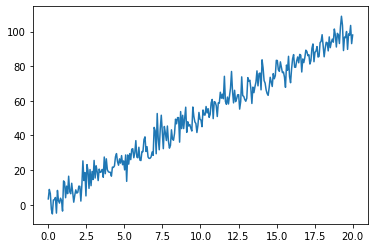

In [27]:
plt.plot(x, y)

In [28]:
n = x.shape[0]
mnum = (n * np.dot(x, y)) - (x.mean() * y.mean())

In [29]:
den = (n* np.dot(x, x)) - (x.mean() ** 2)

In [33]:
m = mnum / den

In [36]:
bnum = (y.mean() * np.dot(x, x)) - (x.mean() * np.dot(x, y))
br = bnum / den
yr = (x*m) + br

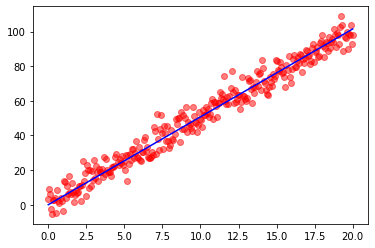

In [38]:
plt.plot(x, y, 'ro', alpha=0.5)
plt.plot(x, yr, 'b')
plt.show()

In [39]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = x.reshape(-1, 1)
model.fit(X=x, y=y)
print(model.intercept_,  model.coef_)

1.2991321450332975 [4.97772436]


# calculando $R^2$

In [113]:
r2 = model.score(x.reshape(-1, 1), y_r)

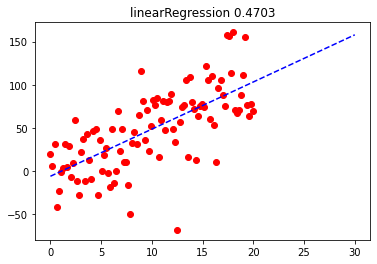

In [114]:
grafica(x, y_r, model, "linearRegression {:.4f}".format(r2))

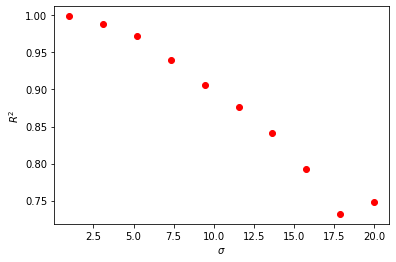

In [79]:
def ruidovsr2(x, y, sigma=2):
    y_r = conruido(y, sigma) 
    model.fit(X=x, y=y_r)
    return model.score(x, y_r)
r2_list = []
sigmas = np.linspace(1, 20, 10)
for sigma in sigmas:
    r2 = ruidovsr2(x.reshape(-1,1), y, sigma=sigma)
    r2_list.append(r2)
plt.plot(sigmas, r2_list, 'ro')
plt.ylabel("$R^2$")
plt.xlabel("$\sigma$")
plt.show()

# Ridge regression

In [7]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=50)
model.fit(x.reshape(-1,1), y_r)  # escala de ruido de 30
prediction = model.predict(x)
r2 = model.score(x.reshape(-1,1), y_r)

NameError: name 'y_r' is not defined

In [116]:
def grafica(x, y, model, title):
    x_new = np.linspace(0, 30, 5).reshape(-1,1)
    y_pred = model.predict(X=x_new)
    plt.plot(x, y, 'ro')
    plt.plot(x_new, y_pred, 'b--')
    plt.title(title)
    plt.show()

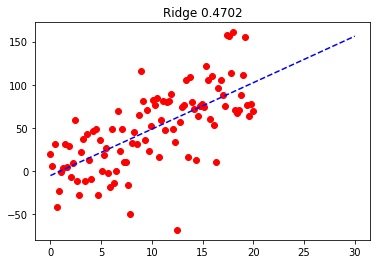

In [117]:
grafica(x, y_r, model, "Ridge {:.4f}".format(r2))

In [8]:
import pandas as pd

In [9]:
features = pd.read_csv("../Data/genomic_features.csv", header=0, index_col=None)

In [10]:
features

,COSMIC_ID,TISSUE_FACTOR,MSI_FACTOR,ABCB1_mut,ABL2_mut,ACACA_mut,ACVR1B_mut,ACVR2A_mut,AFF4_mut,AHCTF1_mut,...,"loss_cnaPANCAN415_(B2M,BUB1B,MGA,TP53BP1)",loss_cnaPANCAN416,loss_cnaPANCAN417,loss_cnaPANCAN418,loss_cnaPANCAN419,loss_cnaPANCAN420,loss_cnaPANCAN421,"loss_cnaPANCAN422, loss_cnaPANCAN423",loss_cnaPANCAN424,loss_cnaPANCAN425
0,1287381,lung_NSCLC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,924100,prostate,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,910924,stomach,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,687561,nervous_system,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1287706,skin,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,687452,Bladder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,906798,Bladder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,906797,Bladder,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,906800,leukemia,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,905947,kidney,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tabla_y = pd.read_csv("../Data/ic50.csv", header=None, index_col=None)

In [12]:
tabla_y.columns = ["COSMIC_ID", "y"]
tabla_y

,COSMIC_ID,y
0,1287381,4.927579
1,924100,1.710219
2,910924,2.906657
3,687561,4.320301
4,1287706,3.496982
5,687452,4.194036
6,906798,2.699101
7,906797,4.638347
8,906800,0.757602
9,905947,3.315073


In [13]:
dataset = pd.merge(features, tabla_y, on="COSMIC_ID")

In [14]:
Y = dataset["y"]

In [15]:
columnas = list(dataset.columns)

In [16]:
columnas.pop(-1)

'y'

In [17]:
X = dataset[columnas]

In [18]:
X.columns.shape

(680,)

In [19]:
X.describe().columns.shape

(679,)

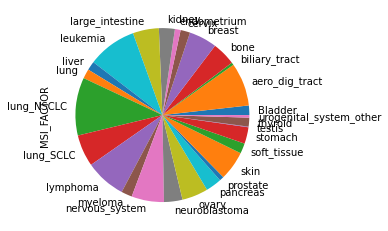

In [157]:
X.groupby('TISSUE_FACTOR').count().MSI_FACTOR.plot.pie()

In [20]:
unicas = X["TISSUE_FACTOR"].unique()

In [21]:
conversion = dict(zip(unicas, np.arange(0, unicas.shape[0])))

In [22]:
conversion

{'lung_NSCLC': 0,
 'prostate': 1,
 'stomach': 2,
 'nervous_system': 3,
 'skin': 4,
 'Bladder': 5,
 'leukemia': 6,
 'kidney': 7,
 'thyroid': 8,
 'aero_dig_tract': 9,
 'ovary': 10,
 'lymphoma': 11,
 'soft_tissue': 12,
 'myeloma': 13,
 'pancreas': 14,
 'breast': 15,
 'neuroblastoma': 16,
 'large_intestine': 17,
 'cervix': 18,
 'liver': 19,
 'bone': 20,
 'lung_SCLC': 21,
 'endometrium': 22,
 'lung': 23,
 'biliary_tract': 24,
 'urogenital_system_other': 25,
 'testis': 26}

In [23]:
X["TISSUE_FACTOR_CODED"] = X["TISSUE_FACTOR"].apply(lambda x: conversion[x])

In [24]:
columns2 = list(X.columns)
columns2.pop(1)

'TISSUE_FACTOR'

In [25]:
X_coded = X[columns2]

In [26]:
alpha = 3
model = Ridge(alpha=alpha)
model.fit(X_coded, Y)  # escala de ruido de 30
prediction = model.predict(X_coded)
r2 = model.score(X_coded, Y)
print(r2)

0.7238111832641486


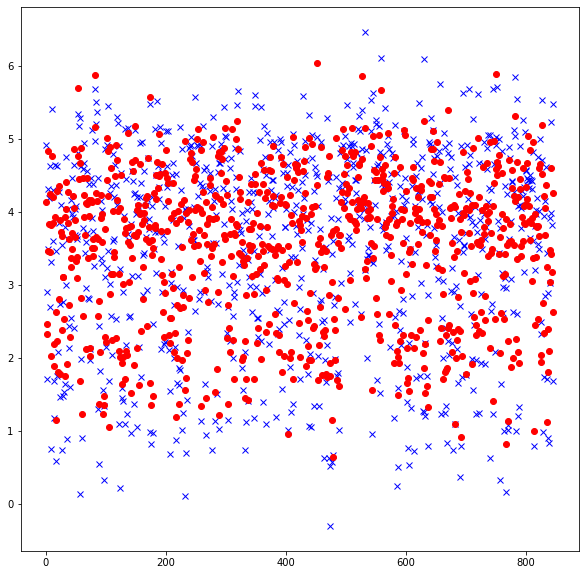

In [27]:
plt.figure(figsize=(10,10))
plt.plot(Y.values, 'bx')
plt.plot(prediction, 'ro')

In [49]:
def r2max(alpha, X, Y):
    model = Ridge(alpha=alpha)
    model.fit(X, Y)  # escala de ruido de 30
    r2 = model.score(X, Y)
    return r2

r2ses = []
alphas = np.logspace(-2, 3, 50)
for alpha in alphas:
    r2ses.append(r2max(alpha, X_coded, Y))

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0379e-16): result may not be accurate.
  overwrite_a=True).T


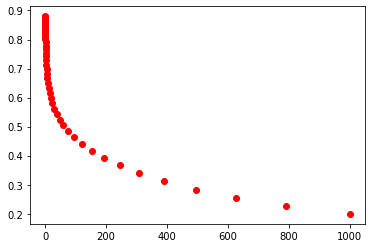

In [50]:
plt.plot(alphas, r2ses, 'ro')

(-0.1, 0.1)

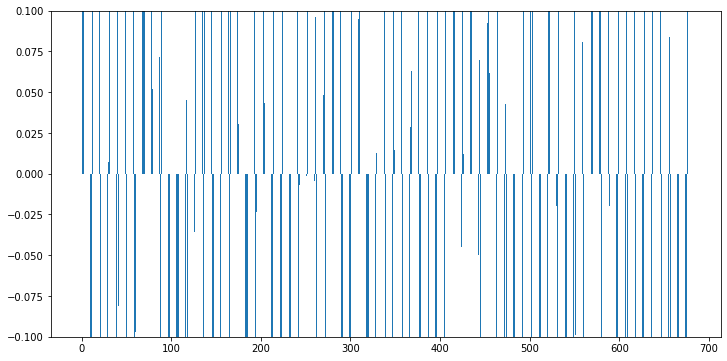

In [74]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(680), model.coef_, 0.3)
plt.ylim(-0.1, 0.1)

In [94]:
alpha = alphas[10]
print(alpha)
model = Ridge(alpha=alpha)
model.fit(X_coded, Y)  # escala de ruido de 30
prediction = model.predict(X_coded)
r2 = model.score(X_coded, Y)
print(r2)

0.10481131341546858
0.8565867344744639


# Con fines demostrativos, no es recomendable reducir features con Ridge

In [92]:
mask = np.abs(model.coef_) <= 0.1
mayores001 = np.array(columns2)[mask]

In [86]:
listaY = list(zip(Y.values, prediction))

In [87]:
sorted_y = np.array(sorted(listaY, key=lambda x: x[0]))

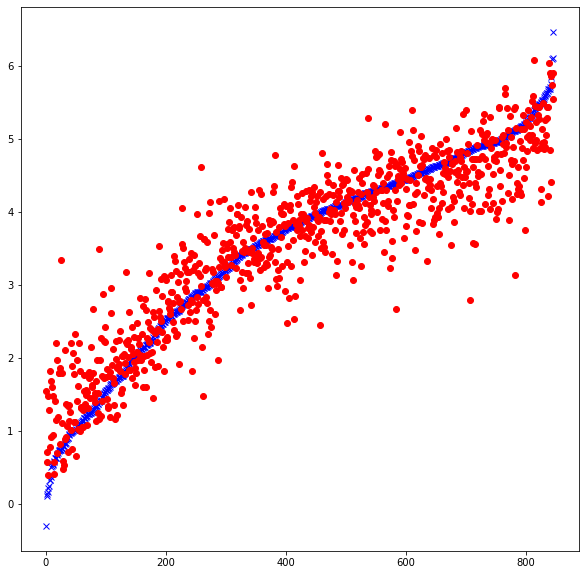

In [88]:
plt.figure(figsize=(10,10))
plt.plot(sorted_y[:,0], 'bx')
plt.plot(sorted_y[:,1], 'ro')

# Tarea: Hacer estandarización de los datos antes de entrenar el modelo
# Probar con regresion de Ridge

- hacer a mano
- ocupar StandardScaler

In [63]:
means_cols = X_coded.mean(axis=0)
stds_cols = X_coded.std(axis=0)

In [98]:
from sklearn.linear_model import RidgeCV

In [108]:
ridgeregcv?

In [109]:
ridgeregcv = RidgeCV(alphas=np.logspace(-2, 3, 10), cv=10, normalize=True)
ridgeregcv.fit(X_coded, Y)

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [114]:
ridgeregcv.score(X_coded, Y)

0.48775684384701706

# Lasso

In [96]:
from sklearn.linear_model import Lasso

In [115]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_coded, Y, test_size=0.33, random_state=42)

In [120]:
X_test.shape

(280, 680)

In [133]:
lassoModel = Lasso(alpha=0.3)
lassoModel.fit(X_train, y_train)
lassoModel.score(X_test, y_test)

0.0838396186546213

# Buscando el mejor alpha

In [143]:
def r2max(alpha, X_train, y_train, X_test, y_test):
    lassoModel = Lasso(alpha=alpha)
    lassoModel.fit(X_train, y_train)
    r2 = lassoModel.score(X_test, y_test)
    return r2

r2ses = []
alphas = np.linspace(0.01, 0.1, 50)
for alpha in alphas:
    r2ses.append(r2max(alpha,X_train, y_train, X_test, y_test))

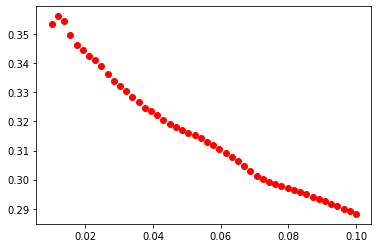

In [144]:
plt.plot(alphas, r2ses, 'ro')

In [154]:
print(alphas[1])

0.01183673469387755


In [151]:
lassoModel = Lasso(alpha=alphas[1])
lassoModel.fit(X_train[listaCoefs], y_train)
lassoModel.score(X_test[listaCoefs], y_test)

0.3560570401154286

(-0.1, 0.1)

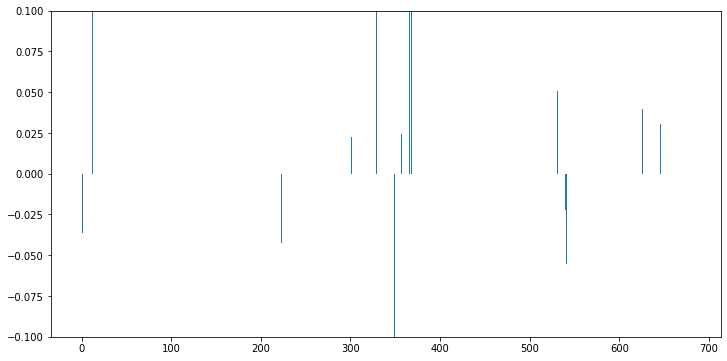

In [148]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(680), lassoModel.coef_, 0.3)
plt.ylim(-0.1, 0.1)

In [150]:
listaCoefs = np.array(columns2)[np.abs(lassoModel.coef_) > 0]
listaCoefs

array(['COSMIC_ID', 'MSI_FACTOR', 'ANK3_mut', 'BMPR2_mut', 'BRAF_mut',
       'CTNNB1_mut', 'FAT1_mut', 'KDM6A_mut', 'KRAS_mut', 'MACF1_mut',
       'MLL2_mut', 'MLL3_mut', 'NCOR1_mut', 'RB1_mut', 'SMAD4_mut',
       'TET2_mut', 'TP53_mut', 'XRN1_mut', 'ZNF292_mut',
       'loss_cnaPANCAN2_(STK11)', 'loss_cnaPANCAN26',
       'loss_cnaPANCAN30_(LARP4B)', 'gain_cnaPANCAN59_(CCND1,CTTN)',
       'loss_cnaPANCAN75_(MED17)', 'loss_cnaPANCAN80_(SDHD)',
       'gain_cnaPANCAN88_(PABPC1,UBR5)', 'loss_cnaPANCAN92',
       'loss_cnaPANCAN96', 'loss_cnaPANCAN97', 'loss_cnaPANCAN99_(SOX17)',
       'gain_cnaPANCAN107_(FUS,TAOK2)',
       'gain_cnaPANCAN121_(ACTB,CARD11,PMS2,RAC1)',
       'gain_cnaPANCAN122_(AHR,HDAC9)', 'gain_cnaPANCAN124_(EGFR)',
       'loss_cnaPANCAN144_(BNC2,CDKN2A,JAK2,PSIP1)',
       'loss_cnaPANCAN145_(FANCG,PAX5)',
       'loss_cnaPANCAN146_(GNAQ,NTRK2,PCSK5,TJP2)',
       'gain_cnaPANCAN166_(MDM2,NUP107,SRGAP1)', 'loss_cnaPANCAN169',
       'loss_cnaPANCAN175', 'gain_cn

In [157]:
from sklearn.linear_model import LassoCV
estimator = LassoCV(n_alphas=100)
estimator.fit(X_train, y_train)
estimator.alpha_

/home/dramon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


3782.8199475783185

In [158]:
estimator.score(X_test, y_test)

-4.981351683297497e-05